In [9]:
import layoutparser as lp

import matplotlib.pyplot as plt
%matplotlib inline
from pdf2image import convert_from_path

In [184]:
import numpy as np
import pandas as pd

In [141]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [496]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
import seaborn as sns

In [16]:
ocr_agent = lp.TesseractAgent(languages='por')

In [12]:
images = convert_from_path('/home/davibarreira/Desktop/qdoc.tips_soares-glaucio-ary-dillon-a-democracia-interrompid.pdf')

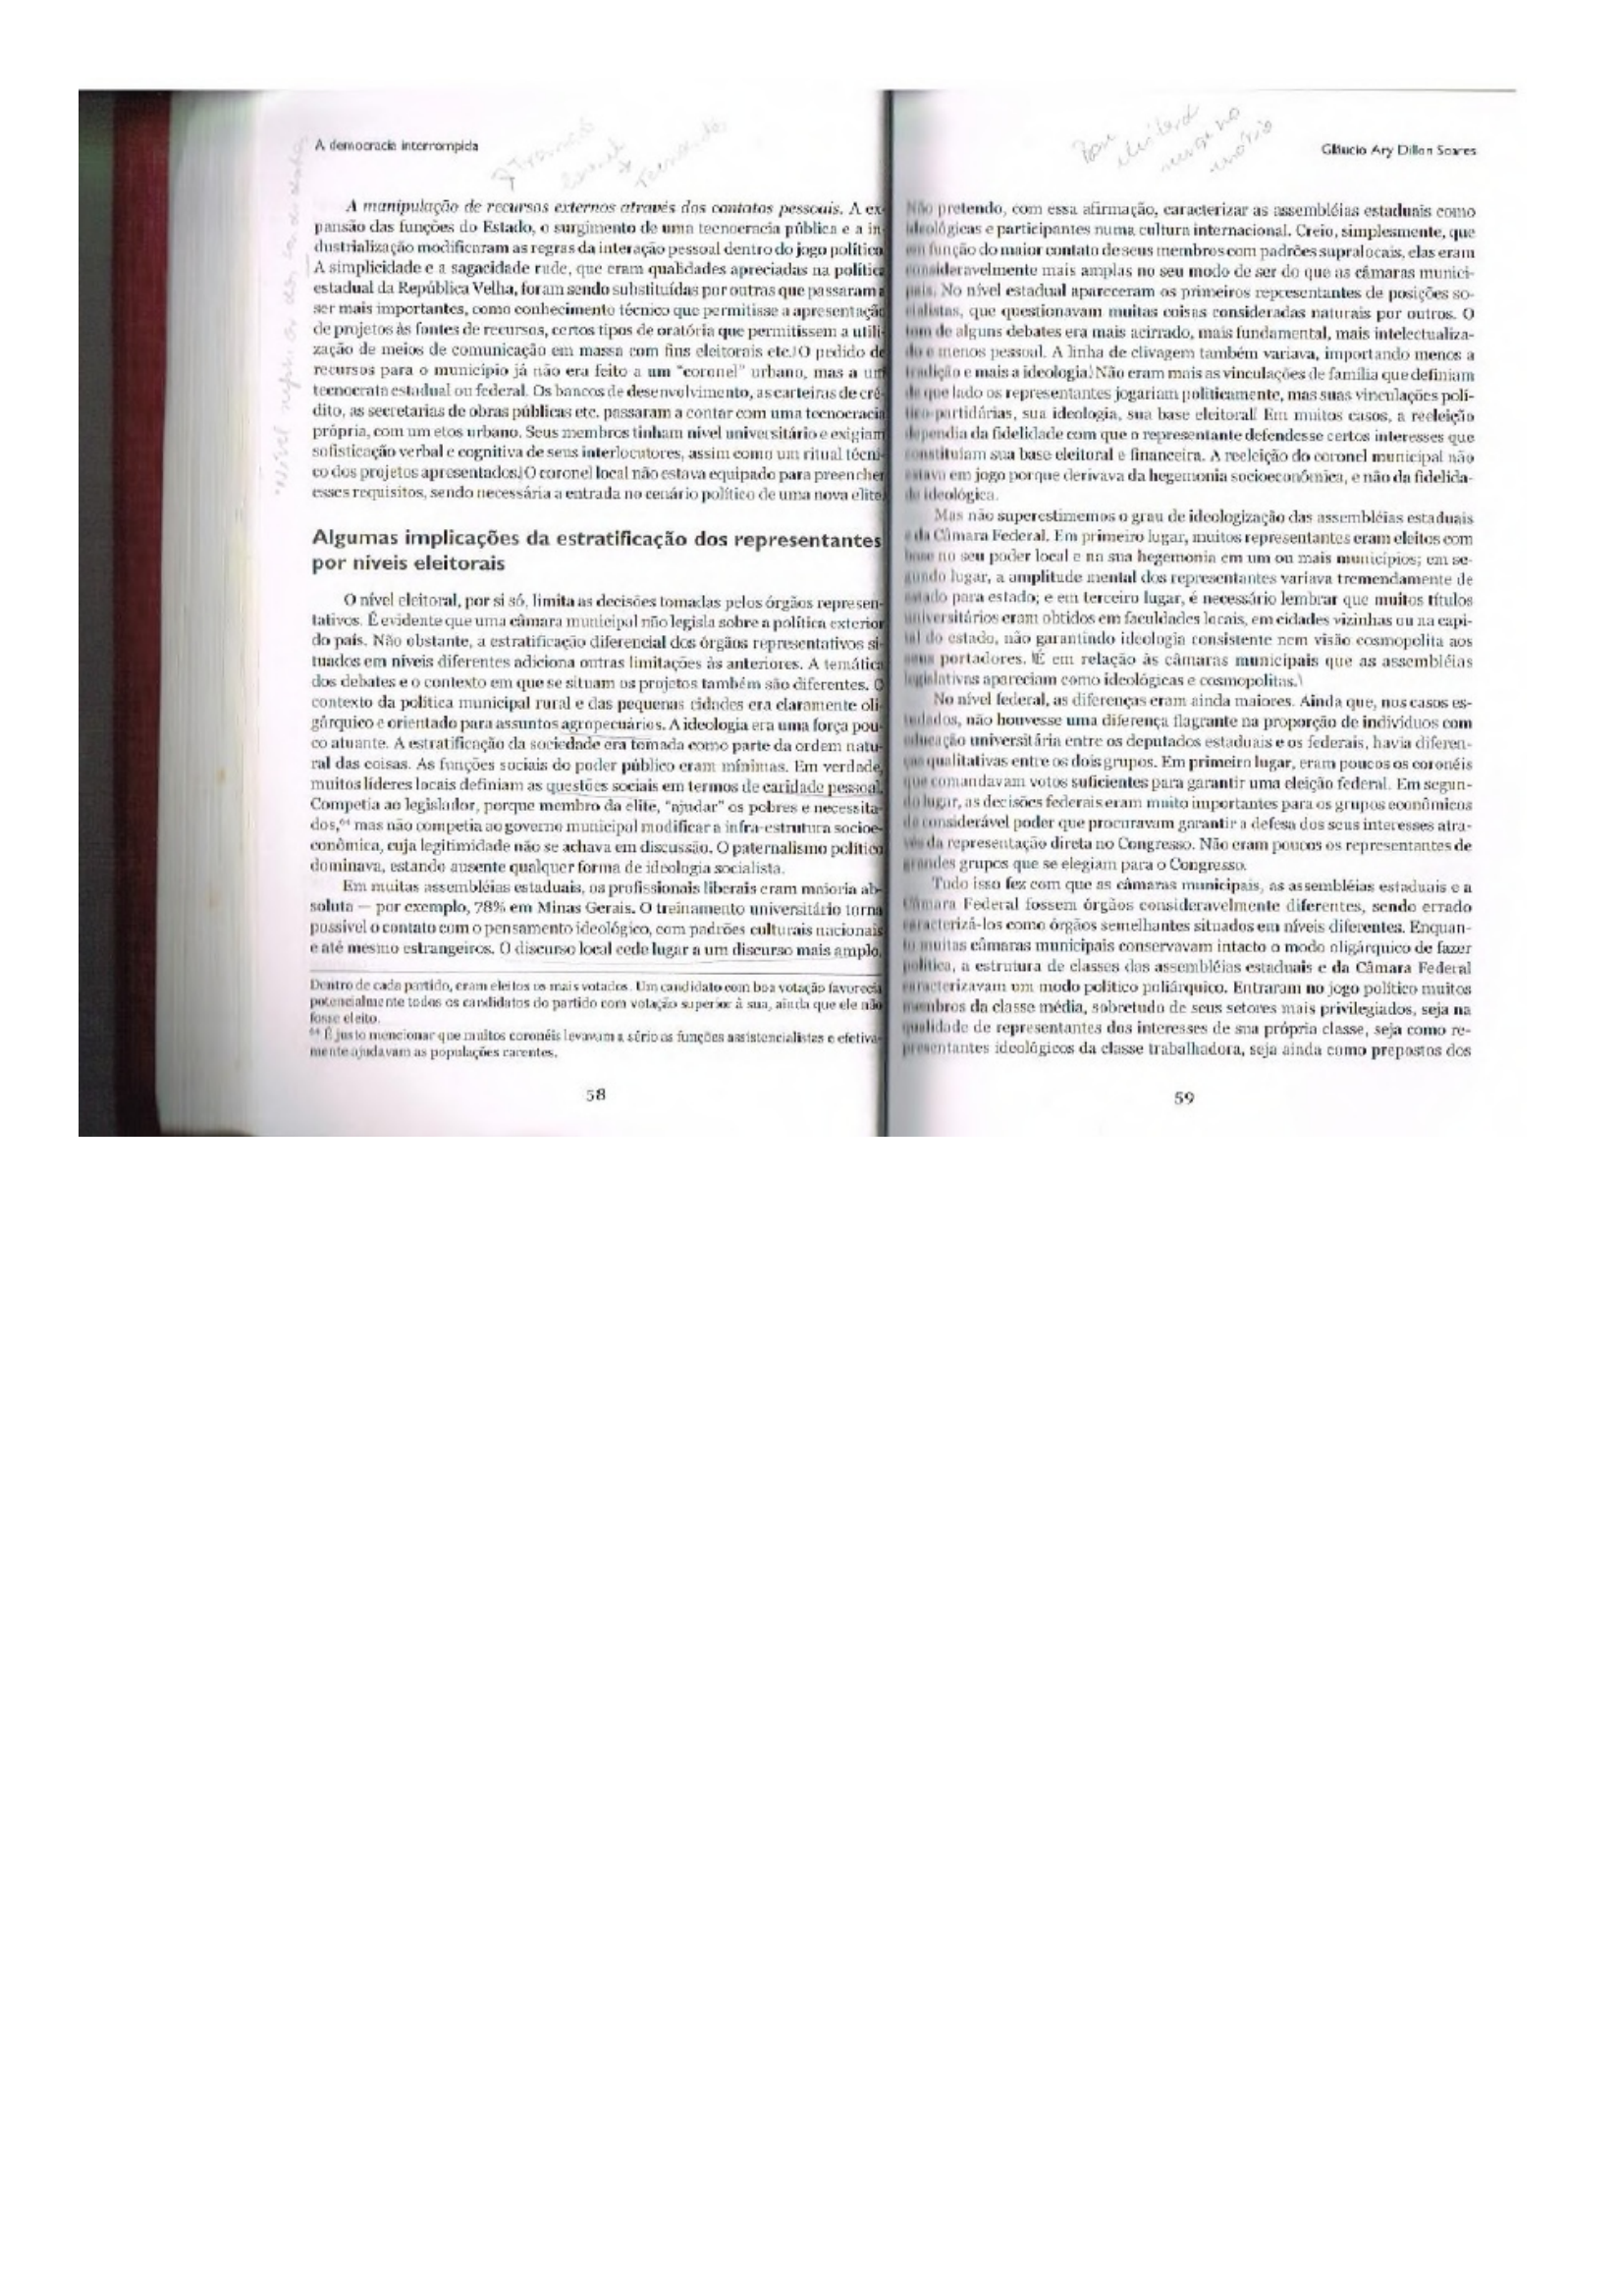

In [50]:
images[30]

In [ ]:
image = images[7]
res = ocr_agent.detect(image, return_response=True)
layout = ocr_agent.gather_data(res, agg_level=lp.TesseractFeatureType.WORD)

In [129]:
dl = layout.to_dataframe()

In [561]:
X = pd.DataFrame({'x':dl.x_1, 'y':dl.y_1})

In [569]:
def get_eps(X):
    percentcovered = []
    for i in range(50,90,2):
        db = DBSCAN(eps=i, metric='manhattan').fit(X)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        # clusters = np.unique(labels)[np.argsort(np.unique(labels,return_counts=True)[1])[-2:]]
        clusters = np.unique(labels, return_counts=True)

        percentcovered.append([i, sum(clusters[1][np.argsort(clusters[0])[-2:]])/len(labels)])
        
    pc  = pd.DataFrame(percentcovered)
    eps = np.min(pc[pc[1] > 0.85][0])
    return eps

In [589]:
def get_limits(X, eps):
    db = DBSCAN(eps=eps, metric='manhattan').fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    clusters = np.unique(labels)[np.argsort(np.unique(labels,return_counts=True)[1])[-2:]]
    print(np.argsort(np.unique(labels, return_counts=True)[1])[-2:])
    print(np.unique(labels, return_counts=True))
    
    page = {'page0':{}, 'page1':{}}
    for i in [0,1]:
        df = X[X.label == clusters[i]]
        page['page'+str(i)]['xmin'] = np.min(df.x)
        page['page'+str(i)]['xmax'] = np.max(df.x)
        page['page'+str(i)]['ymin'] = np.min(df.y)
        page['page'+str(i)]['ymax'] = np.max(df.y)
        
    page['page0']['ymax'] = np.minimum(page['page0']['ymax'],page['page1']['ymax']) + 10
    page['page1']['ymax'] = page['page0']['ymax']
    
    page['page0']['ymin'] = np.maximum(page['page0']['ymin'],page['page1']['ymin']) - 10
    page['page1']['ymin'] = page['page0']['ymin']
    return page


In [590]:
db = DBSCAN(eps=get_eps(X), metric='manhattan').fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [591]:
# np.unique(labels, return_counts=True)
X['label'] = labels

In [592]:
np.unique(labels)

array([-1,  0,  1,  2])

In [593]:
# X[X.label == clusters[1]].x.min()
get_limits(X,68)

[2 3]
(array([-1,  0,  1,  2]), array([ 20,   5, 534, 594]))


{'page0': {'xmin': 238, 'xmax': 815, 'ymin': 180, 'ymax': 1062},
 'page1': {'xmin': 910, 'xmax': 1486, 'ymin': 180, 'ymax': 1062}}

[2 3]
(array([-1,  0,  1,  2]), array([ 20,   5, 534, 594]))


In [595]:
page

{'page0': {'xmin': 238, 'xmax': 815, 'ymin': 180, 'ymax': 1062},
 'page1': {'xmin': 910, 'xmax': 1486, 'ymin': 180, 'ymax': 1062}}

[2 3]
(array([-1,  0,  1,  2]), array([ 20,   5, 534, 594]))


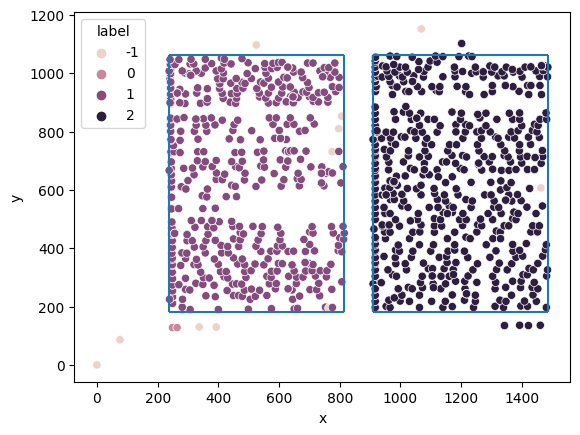

In [596]:
page = get_limits(X,get_eps(X))

sns.scatterplot(data=X, x='x', y='y', hue='label')
for i in ['page0','page1']:
    plt.hlines(page[i]['ymax'],page[i]['xmin'],page[i]['xmax'])
    plt.hlines(page[i]['ymin'],page[i]['xmin'],page[i]['xmax'])
    plt.vlines(page[i]['xmax'],page[i]['ymin'],page[i]['ymax'])
    plt.vlines(page[i]['xmin'],page[i]['ymin'],page[i]['ymax'])

In [550]:
eps = get_eps(X)
db = DBSCAN(eps=eps, metric='manhattan').fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
clusters = np.unique(labels)[np.argsort(np.unique(labels,return_counts=True)[1])[-2:]]

In [483]:
xmin = X[X.label == clusters[0]].x.max()
xmax = X[X.label == clusters[0]].x.min()
ymin = X[X.label == clusters[1]].x.max()
ymax = X[X.label == clusters[1]].x.min()

238

In [472]:
pc = pd.DataFrame(percentcovered)

# plt.plot(pc[0],pc[1])
np.min(pc[pc[1] > 0.9][0])

65

In [473]:
X['label'] = labels

In [474]:
# X[X.label.isin(clusters)]
page1 = X[X.label == clusters[0]]

xmin = np.min(page1.x)
xmax = np.max(page1.x)
ymin = np.min(page1.y)
ymax = np.max(page1.y)

In [475]:
X.value_counts(subset='label')

label
 2    594
 1    534
-1     20
 0      5
dtype: int64

In [476]:
import seaborn as sns

<AxesSubplot: xlabel='x', ylabel='y'>

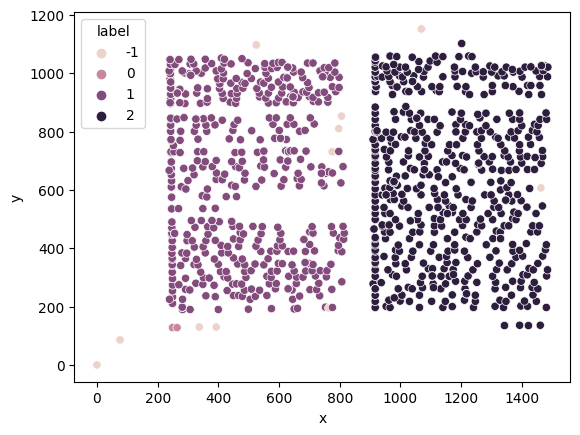

In [477]:
sns.scatterplot(data=X, x='x', y='y', hue='label')

In [208]:
pd.unique(labels)

array([-1,  0,  1])

array([-1, -1, -1, ..., -1, -1, -1])

In [160]:
# plt.plot(np.cumsum(dl.x_1))
# plt.plot(np.cumsum(dl.x_1.sort_values().reset_index(drop=True)))

0          0
1         76
2         76
3         76
4         76
        ... 
1148    1202
1149    1069
1150    1069
1151    1069
1152    1069
Name: x_1, Length: 1153, dtype: int64

In [181]:
# data = list(zip(dl.x_1,dl.y_1))
# linkage_data = linkage(data, method='ward', metric='euclidean')
# dendrogram(linkage_data)
page_x = np.max(dl.x_1)-np.min(dl.x_1)
page_y = np.max(dl.y_1)-np.min(dl.y_1)


under_x = []
for i in np.linspace(np.min(dl.x_1),np.max(dl.x_2)):
    under_x.append([i, sum(dl.x_1 <= i)/len(dl.x_1)])

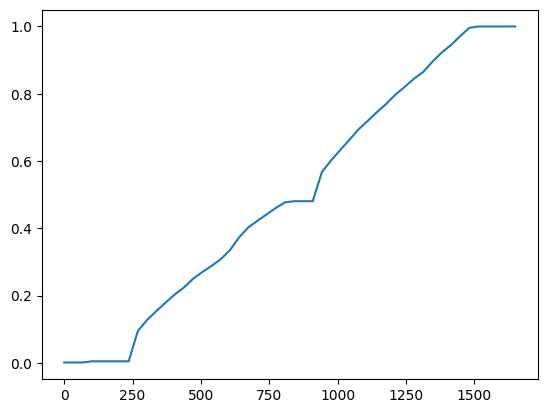

In [190]:
ux = pd.DataFrame(under_x)

plt.plot(ux[0],ux[1])

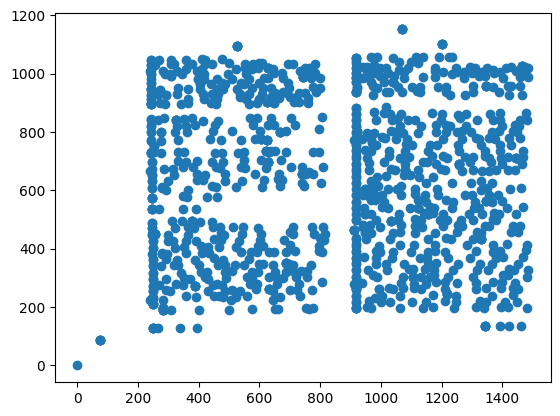

In [162]:
plt.scatter(dl.x_1, dl.y_1)
# plt.scatter(dl.x_2, dl.y_2)

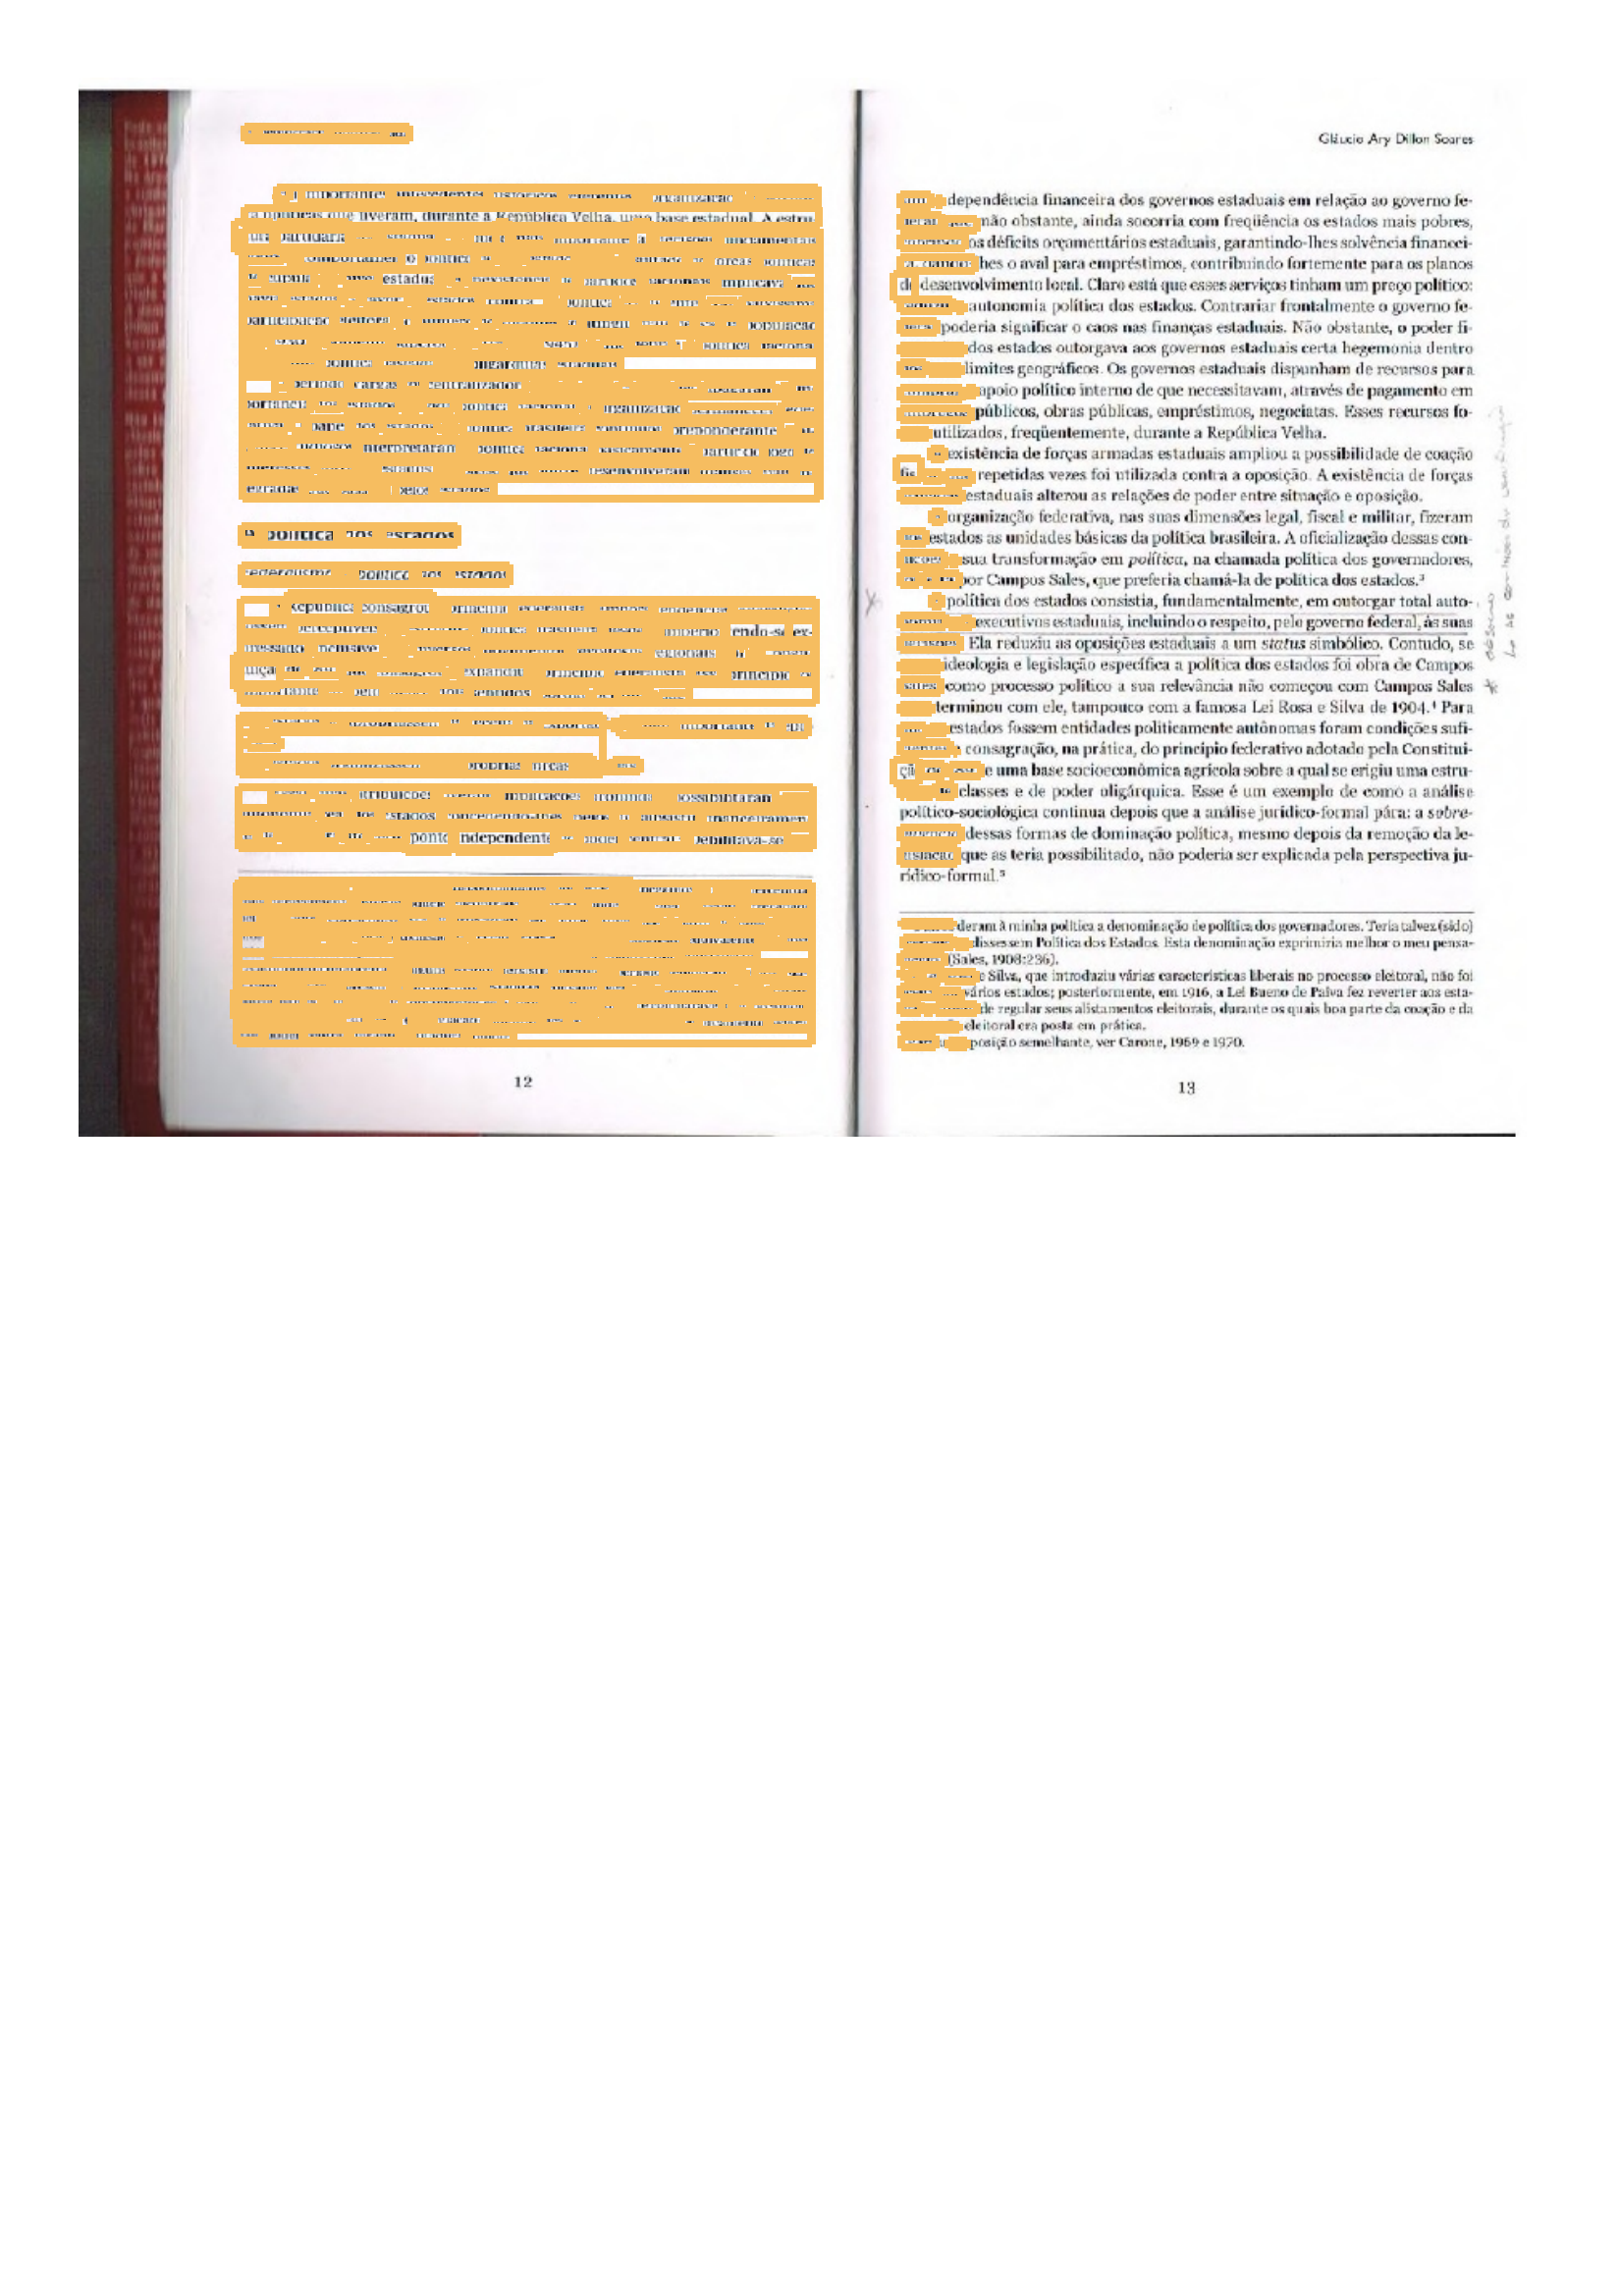

In [126]:
# layout_filter =  layout.filter_by(lp.Rectangle(x_1=70, y_1=200, x_2=1550, y_2=1100))
layout_filter =  layout.filter_by(lp.Rectangle(x_1=70, y_1=100, x_2=1000, y_2=1100))
lp.draw_box(image, layout_filter)

In [54]:
# print(resultado['text'])
resultado

{'text': ' \n\nA democracks interrompica\n\nmanipulação de recursos externos traves dos contatos pessouis, A ei\no das funções do Es mento de uma toengerncia pública e a\ndustrialização modificaram as regras da interação pessoal dentro do joga políti\nA simplicidade e à sagacidade rude, que eram qualidades apreciadas na políti\nestadual da República Velha, foram sendo substituídas por ontras que passaram\n\nprojetos às fontes de recursos, certos tipas de oratória que permitissem a util\nzação de meios de comunicação es massa com fins eleitorais etesO pedido\nmecursos para o município já não era feito a um “corenel” urbano, mas à ul\nteenoerato estadual om federal. Os bancas de desenvolvimento, ascarteiras de cri\ndito, as secretarias de obras públicas etc. passaram a contar com uma teenoer\nprópria, com um etas urbano, Seus membros tinham nivel ersitário e exigim\nsofisticação verbal e cognitiva de seus interlocutores, assim como vim ritual tés\neo des projetos apresentados! O coronel 